In [2]:
import pandas as pd

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head(5)

C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_19684\697692036.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
0,120420285.0,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,07/08/2012 06:00:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,NaN,"(42.34638135, -71.10379454)"
1,120419202.0,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,07/08/2012 06:03:00 AM,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,NaN,"(42.31684135, -71.07458456)"
2,120419213.0,ARMROB,ROBBERY,03xx,D4,625,07/08/2012 06:26:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,765118.8605,2950217.536,JERSEY ST,QUEENSBERRY ST,"(42.34284135, -71.09698955)"
3,120419223.0,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,07/08/2012 06:56:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)"
4,120419236.0,ARMROB,ROBBERY,03xx,E18,496,07/08/2012 07:15:00 AM,Firearm,No,No,Last,2012,7,Sunday,Part One,759042.7315,2923832.681,COLLINS ST,NaN,"(42.27051636, -71.11989955)"


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_19684\2397096610.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


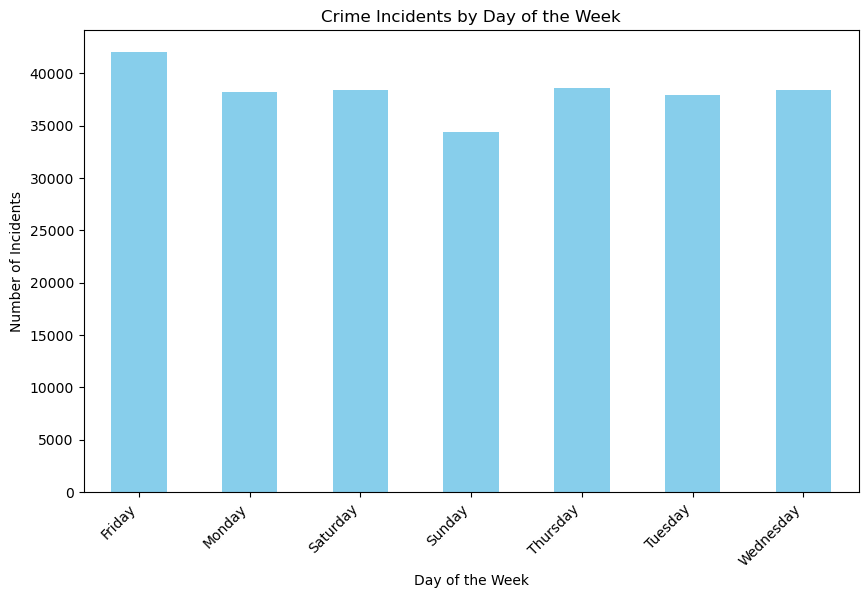

Number of Crimes per Week:
Friday       42031
Monday       38256
Saturday     38446
Sunday       34393
Thursday     38627
Tuesday      37911
Wednesday    38392
Name: DAY_WEEK, dtype: int64

Day with Maximum Crimes: Friday
Day with Minimum Crimes: Sunday


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Count the number of crimes per week
crimes_per_week = df['DAY_WEEK'].value_counts().sort_index()

# Plotting a bar graph for the DAY_WEEK column
plt.figure(figsize=(10, 6))
crimes_per_week.plot(kind='bar', color='skyblue')
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the number of crimes per week
print("Number of Crimes per Week:")
print(crimes_per_week)

# Print the day with the maximum and minimum number of crimes
max_crime_day = crimes_per_week.idxmax()
min_crime_day = crimes_per_week.idxmin()

print(f"\nDay with Maximum Crimes: {max_crime_day}")
print(f"Day with Minimum Crimes: {min_crime_day}")


In [3]:
import pandas as pd

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extract latitude and longitude from the "Location" column
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\((.*), (.*)\)')

# Convert the extracted values to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Display the modified DataFrame
print(df[['Latitude', 'Longitude']].head(5))


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_17476\2788585999.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


    Latitude  Longitude
0  42.346381 -71.103795
1  42.316841 -71.074585
2  42.342841 -71.096990
3  42.316441 -71.065829
4  42.270516 -71.119900


In [4]:
import pandas as pd
import folium

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extract latitude and longitude from the "Location" column
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\((.*), (.*)\)')

# Convert the extracted values to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Create a Folium map centered around Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)  # Coordinates for Boston

# Add dots for each data point
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # Adjust the radius as needed
        color='blue',  # Customize the color of the dots
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
    ).add_to(m)

# Display the map
m.save('boston_map.html')  # Save the map as an HTML file

C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_17476\760424633.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_16600\2735247510.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


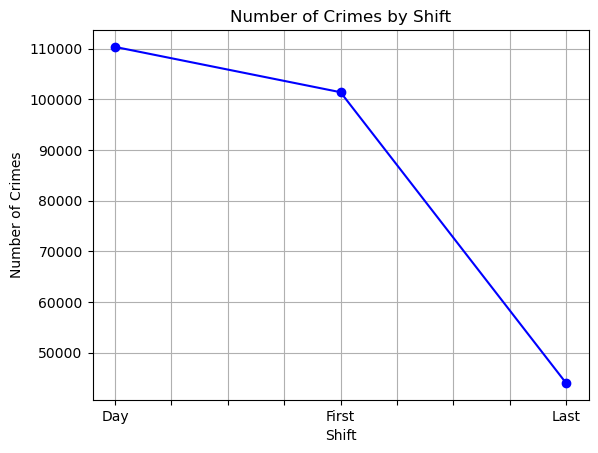

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Count occurrences of each shift and plot a line graph
shift_counts = df['SHIFT'].value_counts()
shift_counts.plot(kind='line', marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Number of Crimes by Shift')
plt.xlabel('Shift')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_7068\2084230806.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


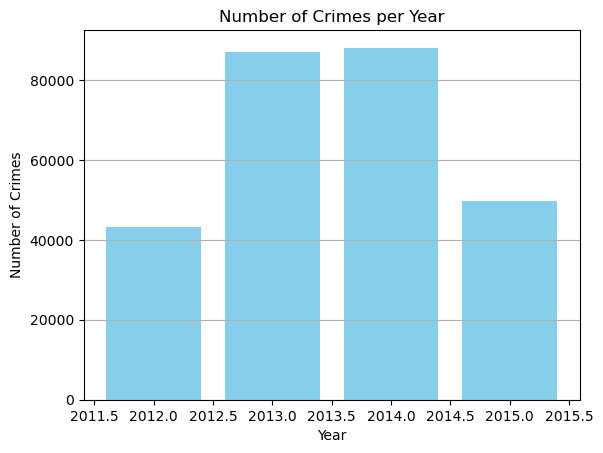

              Year  Crime Count
count     4.000000      4.00000
mean   2013.500000  67014.00000
std       1.290994  23873.59406
min    2012.000000  43186.00000
25%    2012.750000  48116.50000
50%    2013.500000  68406.00000
75%    2014.250000  87303.50000
max    2015.000000  88058.00000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Group by year and count the number of crimes per year
crime_counts_per_year = df.groupby('Year').size().reset_index(name='Crime Count')

# Plot a bar chart for the number of crimes per year
plt.bar(crime_counts_per_year['Year'], crime_counts_per_year['Crime Count'], color='skyblue')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

# Print statistics for the number of crimes per year
print(crime_counts_per_year.describe())


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_16600\3306907483.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


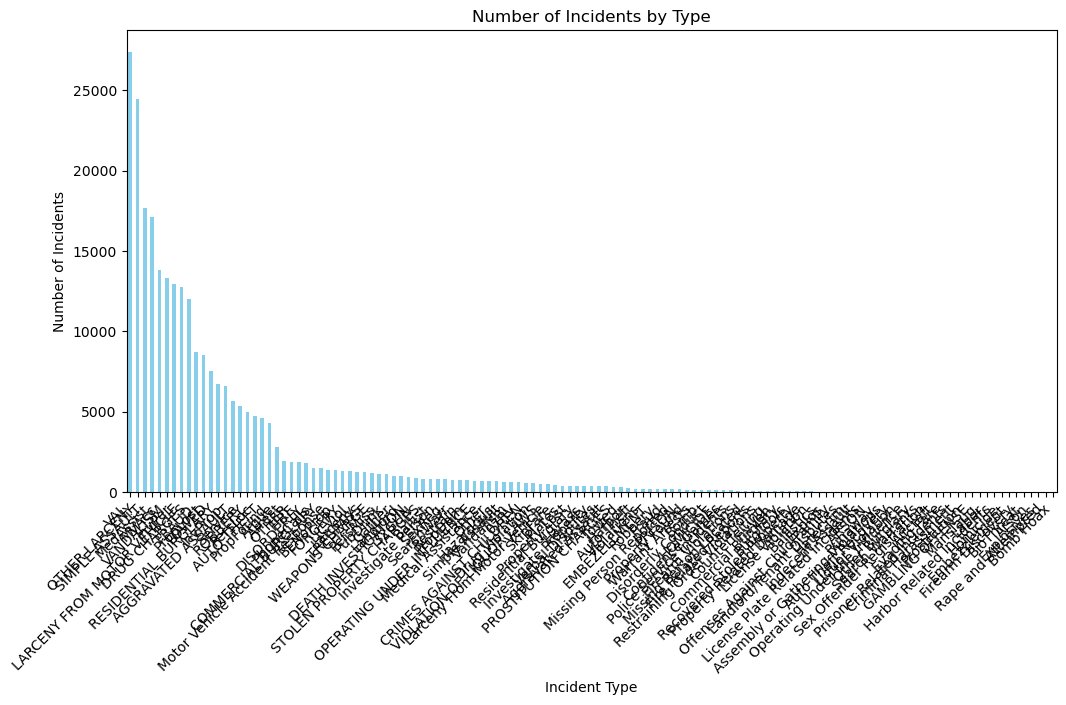

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Group by incident type and count the number of incidents for each type
incident_counts = df['INCIDENT_TYPE_DESCRIPTION'].value_counts()

# Plot a bar chart for the type of incidents
incident_counts.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Number of Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_3148\2543751350.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


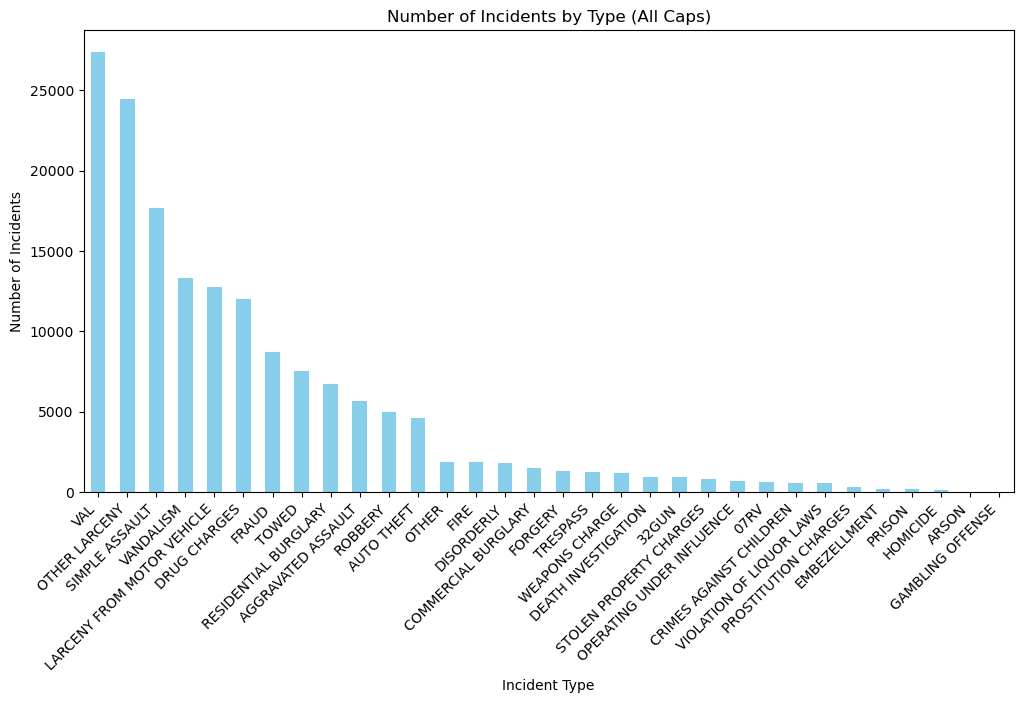

Incident Type with the Highest Frequency: VAL
Incident Type with the Lowest Frequency: GAMBLING OFFENSE


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter rows where the incident type description is in all caps
filtered_df = df[df['INCIDENT_TYPE_DESCRIPTION'].str.isupper()]

# Group by incident type and count the number of incidents for each type
incident_counts = filtered_df['INCIDENT_TYPE_DESCRIPTION'].value_counts()

# Plot a bar chart for the type of incidents
incident_counts.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Number of Incidents by Type (All Caps)')
plt.xlabel('Incident Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the types with max and min frequencies
max_freq_type = incident_counts.idxmax()
min_freq_type = incident_counts.idxmin()

print(f"Incident Type with the Highest Frequency: {max_freq_type}")
print(f"Incident Type with the Lowest Frequency: {min_freq_type}")

C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_16600\2480119028.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


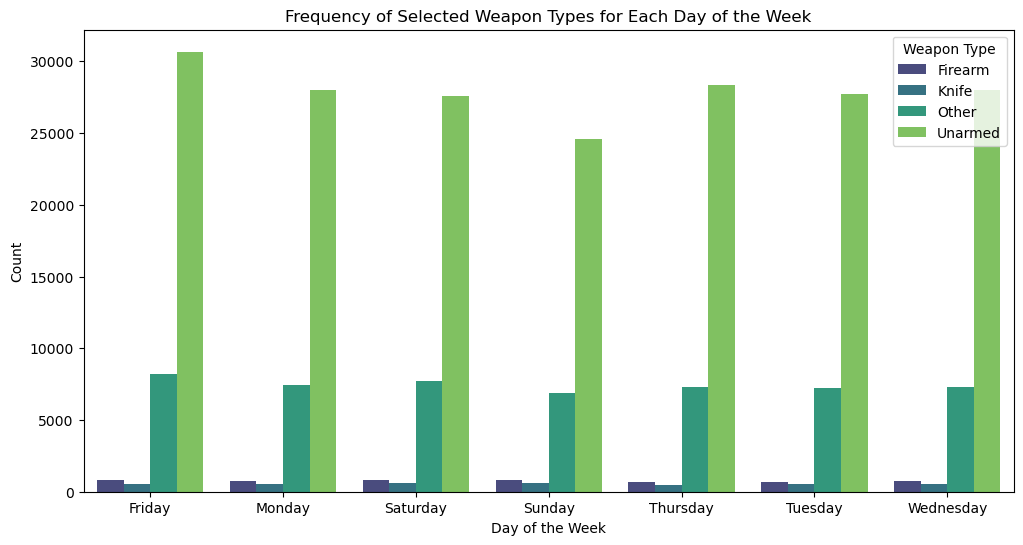

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'
df = pd.read_csv(file_path)

# Filter relevant columns
df_subset = df[['WEAPONTYPE', 'DAY_WEEK']]

# Filter specific weapon types (Firearm, Knife, Other, Unarmed)
selected_weapon_types = ['Firearm', 'Knife', 'Other', 'Unarmed']
df_subset = df_subset[df_subset['WEAPONTYPE'].isin(selected_weapon_types)]

# Drop rows with missing values
df_subset.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df_subset['WEAPONTYPE_ENCODED'] = label_encoder.fit_transform(df_subset['WEAPONTYPE'])
df_subset['DAY_WEEK_ENCODED'] = label_encoder.fit_transform(df_subset['DAY_WEEK'])

# Create a count plot to visualize the frequency of each selected weapon type for each day of the week
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DAY_WEEK_ENCODED', hue='WEAPONTYPE_ENCODED', data=df_subset, palette='viridis')

# Get the actual day names from encoded values
day_names = label_encoder.inverse_transform(range(7))

# Set x-axis ticks and labels
plt.xticks(ticks=range(7), labels=day_names)

# Get the original weapon names from the labels
weapon_names = ['Firearm', 'Knife', 'Other', 'Unarmed']

# Update legend with actual weapon names
ax.legend(title='Weapon Type', labels=weapon_names, loc='upper right')

plt.title('Frequency of Selected Weapon Types for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

C:\Users\Tiyasa\AppData\Local\Temp\ipykernel_3148\151485671.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


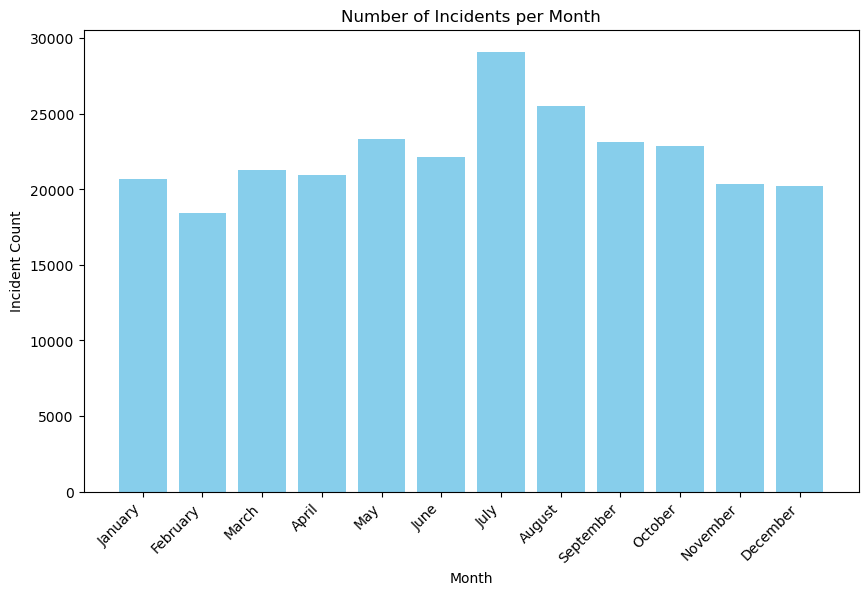

Incident Counts per Month:
        Month  Incident Count
0     January           20697
1    February           18461
2       March           21295
3       April           20930
4         May           23294
5        June           22132
6        July           29113
7      August           25525
8   September           23159
9     October           22836
10   November           20379
11   December           20235

Month with the highest number of incidents: July
Month with the lowest number of incidents: February


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Specify the file path for a CSV file
file_path = r'C:\Users\Tiyasa\Desktop\Courses_Sem1\MTH 522\crime-incident-reports-july-2012-august-2015-source-legacy-system.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Group by month and count the number of incidents per month
incidents_per_month = df.groupby('Month').size().reset_index(name='Incident Count')

# Convert numeric month values to month names
incidents_per_month['Month'] = incidents_per_month['Month'].apply(lambda x: calendar.month_name[x])

# Plot a bar graph for incidents per month
plt.figure(figsize=(10, 6))
plt.bar(incidents_per_month['Month'], incidents_per_month['Incident Count'], color='skyblue')
plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Print the incident counts along with the month
print("Incident Counts per Month:")
print(incidents_per_month)

# Find the month with the highest and lowest number of incidents
max_month = incidents_per_month.loc[incidents_per_month['Incident Count'].idxmax()]['Month']
min_month = incidents_per_month.loc[incidents_per_month['Incident Count'].idxmin()]['Month']

print(f'\nMonth with the highest number of incidents: {max_month}')
print(f'Month with the lowest number of incidents: {min_month}')
